In [1]:
import re
import pandas as pd

def process_hs24_study_programs(content):
    # Split the content based on "Course Catalog  "
    catalogs = re.split(r"Course Catalog\s+", content)

    # Initialize a list to store extracted data
    course_data = []

    # Process each catalog (skip the first empty split if present)
    for catalog in catalogs[1:]:
        catalog = catalog.strip()  
        if catalog:  
            # Extract the program name
            program = re.search(r"Link:\s*(.+)", catalog)
            program = program.group(1).strip() if program else None

            # Extract Languages of Instruction
            languages = re.search(r"Languages of Instruction:\s*(.+)", catalog)
            languages = languages.group(1).strip() if languages else None

            # Extract Regulations (URLs starting with http or https)
            regulations = re.search(r"Regulations:\s*(https?://\S+)", catalog)
            regulations = regulations.group(1).strip() if regulations else None

            # Extract Organization information
            organization = re.search(r"Organization: (.*)", catalog)
            organization = organization.group(1).strip() if organization else None
            organization = organization if len(organization) > 1 else None

            # Extract Responsible Instructor
            responsible = re.search(r"Responsible Instructor: (.*)", catalog)
            responsible = responsible.group(1).strip() if responsible else None
            responsible = responsible if len(responsible) > 1 else None

            # Extract Coordination details
            coordination = re.search(r"Coordination: (.*)", catalog)
            coordination = coordination.group(1).strip() if coordination else None
            coordination = coordination if len(coordination) > 1 else None

            # Extract "Part Of" section
            part_of = re.findall(r"Part of:\s*\n(.+?)(?=\nPage \d+ of \d+|$)", catalog, re.DOTALL)
            part_of = part_of[0].strip().replace("\n", "; ") if part_of else None

            # Append the extracted details as a dictionary
            course_data.append({
                "Program": program,
                "Languages": languages,
                "Regulations": regulations,
                "Organization": organization,
                "Responsible Instructor": responsible,
                "Coordination": coordination,
                "Part Of": part_of
            })

   
    df_result = pd.DataFrame(course_data)
    
    df_result['Part Of'] = df_result['Part Of'].apply(lambda x: ";".join([part.strip() for part in x.split(";") if "Page " not in part]) if pd.notnull(x) else x)

    
    return df_result

file_path = "../data/text/HS24/VVZ_HS24_study_programs.txt"

with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()
df_result = process_hs24_study_programs(content)  
df_result.tail()


,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
688,Major Economics (Fast Track),None,None,"Faculty of Business, Economics and Informatics",None,None,Master of Science UZH in Business and Economic...
689,Major Management and Economics (Fast Track),None,None,None,None,None,Master of Science UZH in Business and Economic...
690,Major Betriebswirtschaftslehre (Fast Track),None,None,None,None,None,Master of Science UZH in Business and Economic...
691,Major Banking and Finance (Fast Track),None,None,None,None,None,Master of Science UZH in Business and Economic...
692,Minor 30 Digital Skills,None,None,School for Transdisciplinary Studies,None,None,Master of Arts in Ancient Judaism (JDP);Master...


In [2]:
import pandas as pd
import re

def process_course_catalogs(file_content):
    catalogs = re.split(r"Course Catalog\s+", file_content)
    course_data = []
    
    # Process each catalog (skip the first empty split if present)
    for catalog in catalogs[1:]:
        catalog = catalog.strip()
        if catalog:
            # Extract the line after "Printing date" as the program name
            program_match = re.search(r"Printing date:\s*[^\n]*\n(.+)", catalog)
            program = program_match.group(1).strip() if program_match else None

            # Extract Languages of Instruction
            languages = re.search(r"Languages of Instruction: +([^\n]*)", catalog)
            languages = languages.group(1).strip() if languages else None

            # Extract Regulations (URLs starting with http or https)
            regulations = re.search(r"Regulations:\s*(https?://\S+)", catalog)
            regulations = regulations.group(1).strip() if regulations else None

            # Extract Organization information
            organization = re.search(r"Organization: (.*)", catalog)
            organization = organization.group(1).strip() if organization else None
            organization = organization if len(organization) > 1 else None

            # Extract Responsible Instructor
            responsible = re.search(r"Responsible Instructor: (.*)", catalog)
            responsible = responsible.group(1).strip() if responsible else None
            responsible = responsible if len(responsible) > 1 else None

            # Extract Coordination details
            coordination = re.search(r"Coordination: (.*)", catalog)
            coordination = coordination.group(1).strip() if coordination else None
            coordination = coordination if len(coordination) > 1 else None

            # Extract "Part Of" section
            part_of = re.findall(r"Part of:\s*\n(.+?)(?=\nPage \d+ of \d+|$)", catalog, re.DOTALL)
            part_of = part_of[0].strip().replace("\n", "; ") if part_of else None

      
            course_data.append({
                "Program": program,
                "Languages": languages,
                "Regulations": regulations,
                "Organization": organization,
                "Responsible Instructor": responsible,
                "Coordination": coordination,
                "Part Of": part_of
            })
    df_result = pd.DataFrame(course_data)
    df_result['Part Of'] = df_result['Part Of'].apply(lambda x: ";".join([part.strip() for part in x.split(";") if "Page " not in part]) if pd.notnull(x) else x)
    return df_result

file_path = "../data/text/HS23/VVZ_HS23_study_programs.txt"

with open(file_path, "r", encoding="utf-8") as file:
    hs23 = file.read()
df_result = process_course_catalogs(hs23)  
df_result.tail()


,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
2279,Major 90 Artificial Intelligence (Fast Track),None,None,"Faculty of Business, Economics and Informatics",None,None,Master of Science UZH in Informatics (PVO08)
2280,Doctoral Program Imaging Sciences in Medicine,"German, English",None,Faculty of Medicine,None,None,Doctorate Medical Sciences
2281,Area Compulsory Modules,None,None,Faculty of Medicine,None,None,Imaging Sciences in Medicine
2282,Area Optional Modules,None,None,Faculty of Medicine,None,None,Imaging Sciences in Medicine
2283,Area Elective modules: 1st year of studies Mat...,None,None,Faculty of Science,None,None,1st year of studies: Mathematics;Mathematics 6...


In [9]:
def drop_area(df):
    # Filter out rows where the "Program" column contains the word "Area"
    df_filtered = df[~df['Program'].str.contains("Area", na=False)]
    return df_filtered
    

In [3]:
file_path = "../data/text/FS23/VVZ_FS23_study_programs.txt"

with open(file_path, "r", encoding="utf-8") as file:
    fs23 = file.read()
df_result = process_course_catalogs(fs23) 
df_result.tail()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
2341,Partial Area Core elective modules Biodiversit...,None,None,Faculty of Science,None,None,3rd year of studies: Biodiversity for Single M...
2342,"Partial Area Compulsory modules, Minor Biodive...",None,None,Faculty of Science,None,None,Biodiversity;Biodiversity;Biodiversity;Biodive...
2343,"Partial Area Core elective modules, Minor Biod...",None,None,Faculty of Science,None,None,Biodiversity;Biodiversity;Biodiversity;Biodive...
2344,Area 2nd year of studies: lower-level study Bi...,None,None,Faculty of Science,None,None,Biodiversity
2345,Minor 30 Bioinformatics,English,None,Faculty of Science,Andreas Wagner,Karin Isler,Master of Science UZH in Informatics (RVO22)


In [10]:
file_path = "../data/text/FS24/VVZ_FS24_study_programs.txt"

with open(file_path, "r", encoding="utf-8") as file:
    fs24 = file.read()
df_result = process_course_catalogs(fs24)  
df_result = drop_area(df_result)
df_result.tail()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
2232,Doctoral Program Imaging Sciences in Medicine,"German, English",None,Faculty of Medicine,None,None,Doctorate Medical Sciences
2239,Minor 30 Financial Mathematics,English,None,Faculty of Science,Delia Coculescu,Maja Bettina Schärer,Bachelor of Science Faculty of Science (2021)
2242,Minor 30 Financial Mathematics,English,None,Faculty of Science,Delia Coculescu,Maja Bettina Schärer,Master of Science Faculty of Science (120) (2021)
2243,Minor 30 Financial Mathematics,English,None,Faculty of Science,Delia Coculescu,Maja Bettina Schärer,Master of Arts in Ancient Judaism (JDP);Master...
2244,Single Major 180 Bachelor of Arts UZH in Relig...,English,https://www.trf.uzh.ch/studierende/modulkatalo...,Faculty of Theology and the Study of Religion,Rafael Walthert,None,Bachelor of Arts UZH in Religious Studies and ...


In [5]:
import os


def get_semester_name(file_path):
    return os.path.basename(file_path).split("_")[1]

semester_name = get_semester_name(file_path)

def save_data_csv(semester_name, df_result):
    csv_dir = f"../data/csv/{semester_name}"
    os.makedirs(csv_dir, exist_ok=True)  
    csv_path = os.path.join(csv_dir, f"VVZ_{semester_name}_study_programs.csv")
    df_result.to_csv(csv_path, index=False)

In [6]:
file_paths = ["../data/text/FS24/VVZ_FS24_study_programs.txt", "../data/text/FS23/VVZ_FS23_study_programs.txt", "../data/text/HS23/VVZ_HS23_study_programs.txt"]
for file_path in file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        file_content = file.read()
    df_result = process_course_catalogs(file_content)
    semester_name = get_semester_name(file_path)
    save_data_csv(semester_name, df_result)
    
    

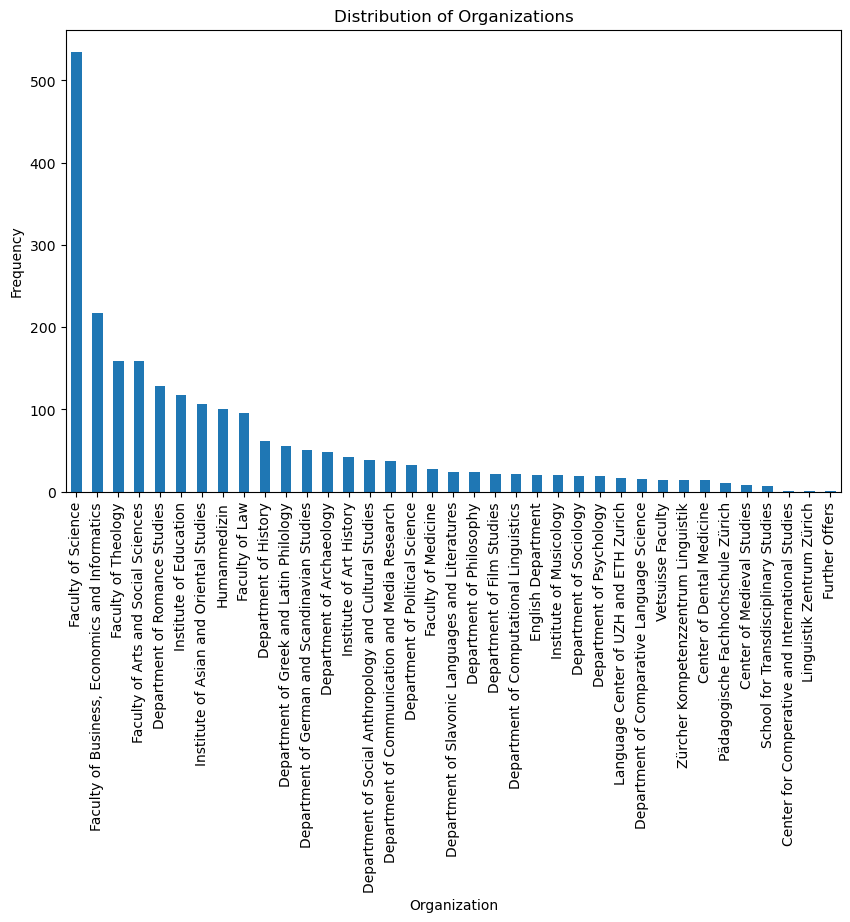

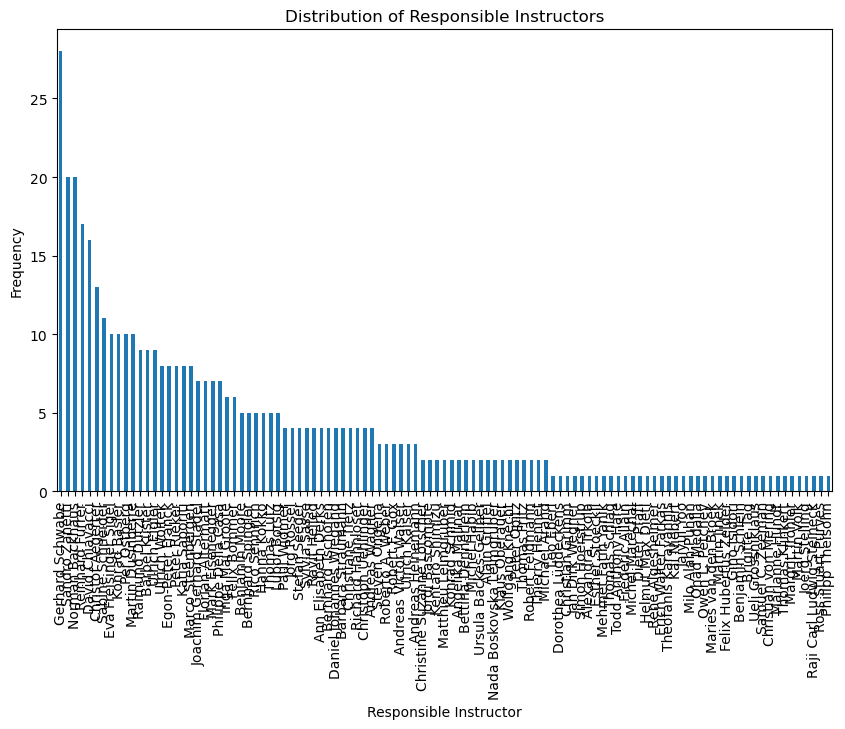

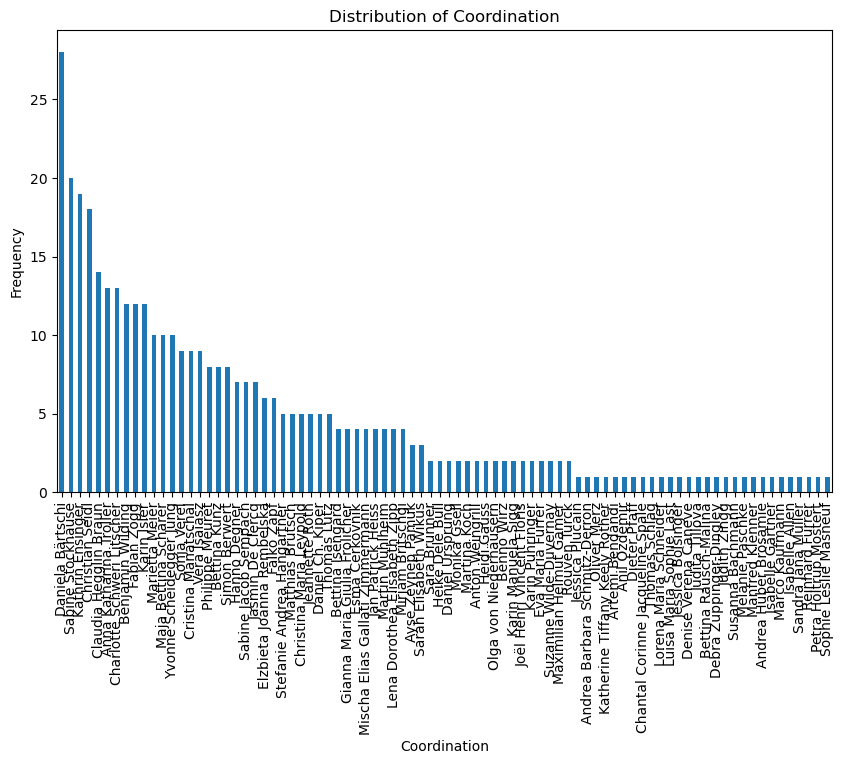

In [7]:
import matplotlib.pyplot as plt

# Plot for Organization
organization_counts = df_result["Organization"].value_counts()
organization_counts.plot(kind='bar', title='Distribution of Organizations', figsize=(10, 6))
plt.xlabel("Organization")
plt.ylabel("Frequency")
plt.show()

# Plot for Responsible Instructor
instructor_counts = df_result["Responsible Instructor"].value_counts()
instructor_counts.plot(kind='bar', title='Distribution of Responsible Instructors', figsize=(10, 6))
plt.xlabel("Responsible Instructor")
plt.ylabel("Frequency")
plt.show()

# Plot for Coordination
coordination_counts = df_result["Coordination"].value_counts()
coordination_counts.plot(kind='bar', title='Distribution of Coordination', figsize=(10, 6))
plt.xlabel("Coordination")
plt.ylabel("Frequency")
plt.show()
